## 1. Import thư viện

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable

## 2. Dataset

### 2.1. Import dataset

In [50]:
CITY = 'BASEL'

weather = pd.read_csv('weather_prediction_dataset.csv')
weather = weather.dropna()
weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [51]:
print(weather.head(5))
print(weather.tail(5))

       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ..

In [52]:
dataset_label = pd.read_csv('weather_prediction_bbq_labels.csv')
dataset_label = dataset_label[['DATE', f'{CITY}_BBQ_weather']]

print('Dataset label shape: ', dataset_label.shape)

print(dataset_label.head(5))
print(dataset_label.tail(5))

Dataset label shape:  (3654, 2)
       DATE  BASEL_BBQ_weather
0  20000101              False
1  20000102              False
2  20000103              False
3  20000104              False
4  20000105              False
          DATE  BASEL_BBQ_weather
3649  20091228              False
3650  20091229              False
3651  20091230              False
3652  20091231              False
3653  20100101              False


### 2.2. Thống kê về dataset

In [53]:
weather.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


### 2.3. Kiểu dữ liệu của từng feature

In [54]:
# Lấy các cột của thành phố được chọn => có tổng cộng 18 thành phố trong Dataset
city_filtered_ds = weather.filter(like=CITY, axis=1)
dataset = pd.concat([weather['DATE'], city_filtered_ds], axis=1)

dataset.sort_values(by='DATE', inplace=True)
dataset_label.sort_values(by='DATE', inplace=True)

# In các cột của dataset
print('Các cột của dataset: ', dataset.columns, '\n')

print('Số dòng và cột của dataset: ', dataset.shape, '\n')

# In ra các cột và kiểu dữ liệu của chúng
print('Các cột và kiểu dữ liệu của chúng: \n', dataset.dtypes)

Các cột của dataset:  Index(['DATE', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object') 

Số dòng và cột của dataset:  (3654, 10) 

Các cột và kiểu dữ liệu của chúng: 
 DATE                        int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
BASEL_global_radiation    float64
BASEL_precipitation       float64
BASEL_sunshine            float64
BASEL_temp_mean           float64
BASEL_temp_min            float64
BASEL_temp_max            float64
dtype: object


### 2.4. Kiểm tra xem dataset có bị thiếu dữ liệu không

In [55]:
# Kiểm tra xem dataset có bị thiếu dữ liệu không
print('Các cột bị thiếu dữ liệu: ', dataset.columns[dataset.isna().any()])
print('Số lượng dữ liệu bị thiếu: \n', dataset.isna().sum())

Các cột bị thiếu dữ liệu:  Index([], dtype='object')
Số lượng dữ liệu bị thiếu: 
 DATE                      0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
BASEL_global_radiation    0
BASEL_precipitation       0
BASEL_sunshine            0
BASEL_temp_mean           0
BASEL_temp_min            0
BASEL_temp_max            0
dtype: int64


### 2.5. Tỷ lệ các mẫu dữ liệu của 2 nhãn là True và False: True có nghĩa là thời tiết có thể có thể tổ chức BBQ (không mưa), và False là ngược lại

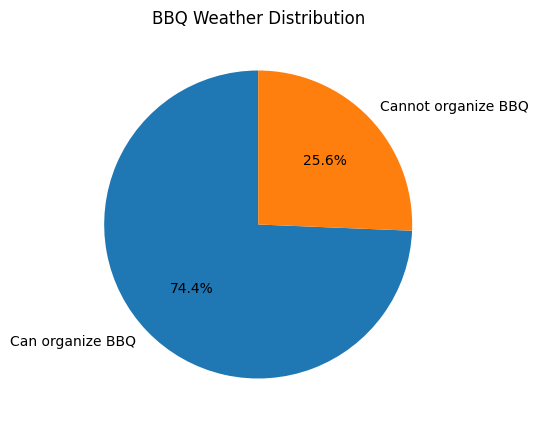

In [56]:
class_value_count =  dataset_label[f'{CITY}_BBQ_weather'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_value_count, labels=['Can organize BBQ', 'Cannot organize BBQ'], autopct='%1.1f%%', startangle=90)
plt.title('BBQ Weather Distribution')
plt.show()

## 3. Tiền xử lý dữ liệu

#### Scale dữ liệu với StandardScaler

In [57]:
std_scaler = StandardScaler()

columns_to_scaler = [
    f'{CITY}_cloud_cover', f'{CITY}_humidity', f'{CITY}_pressure', f'{CITY}_global_radiation',
    f'{CITY}_precipitation', f'{CITY}_sunshine', f'{CITY}_temp_mean', f'{CITY}_temp_min', f'{CITY}_temp_max'
]

data_scaled = std_scaler.fit_transform(dataset[columns_to_scaler])
data_scaled = pd.DataFrame(data_scaled, columns=columns_to_scaler)

dataset = dataset.drop(columns=columns_to_scaler, axis=1)
dataset = pd.concat([dataset, data_scaled], axis=1)

dataset


,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1.110260,1.344433,1.347006,-1.208678,-0.382044,-1.076608,-1.095641,-0.810098,-1.334474
1,20000102,1.110260,1.158857,1.748954,-1.155215,-0.437993,-1.076608,-1.001222,-0.644746,-1.231264
2,20000103,-0.179963,0.602130,1.698710,-0.887898,-0.437993,-0.222009,-1.190060,-1.035579,-1.231264
3,20000104,0.680186,0.416555,1.045546,-0.748894,0.214755,0.517103,-0.960756,-0.975451,-0.921636
4,20000105,-0.179963,1.437221,0.844572,-0.877206,-0.307444,-0.222009,-0.677498,-0.479393,-0.795491
...,...,...,...,...,...,...,...,...,...,...
3649,20091228,0.680186,0.694918,-1.190288,-1.123137,0.345305,-1.007316,-1.055176,-0.900291,-1.231264
3650,20091229,0.680186,1.622796,-1.893696,-1.187293,2.695200,-1.030413,-0.879826,-0.689842,-0.634943
3651,20091230,1.110260,1.622796,-2.509178,-1.347683,2.434101,-1.076608,-0.340287,0.076794,-0.462927
3652,20091231,0.680186,1.715584,-2.772956,-1.240756,0.625054,-1.053510,-0.596568,-0.404233,-0.875765


## 4. Biểu đồ biểu diễn mật độ của dữ liệu theo từng feature

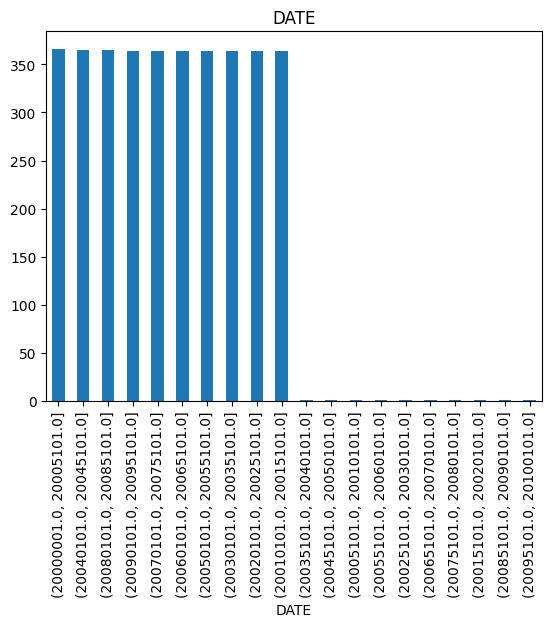

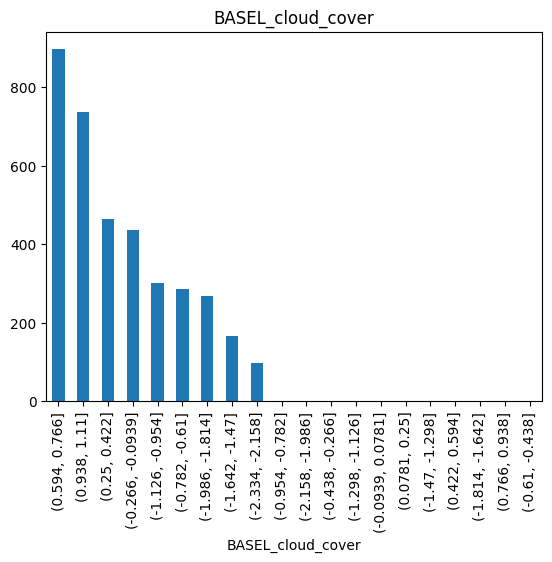

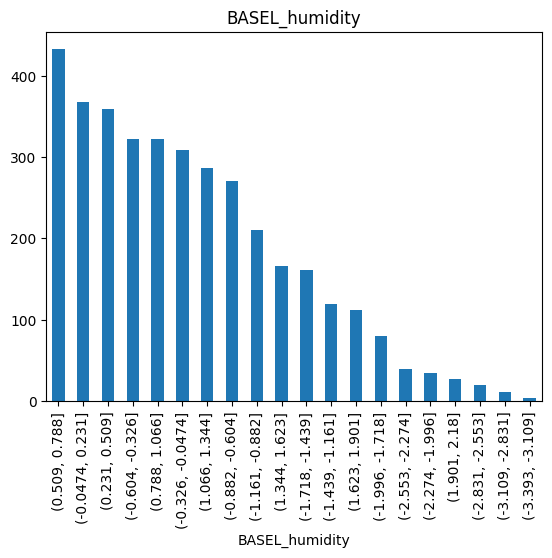

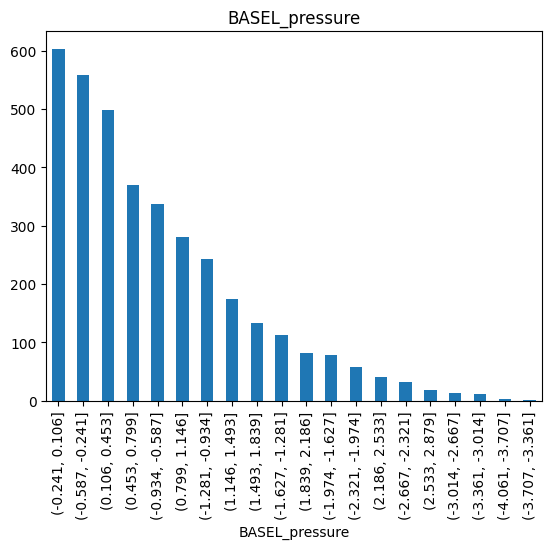

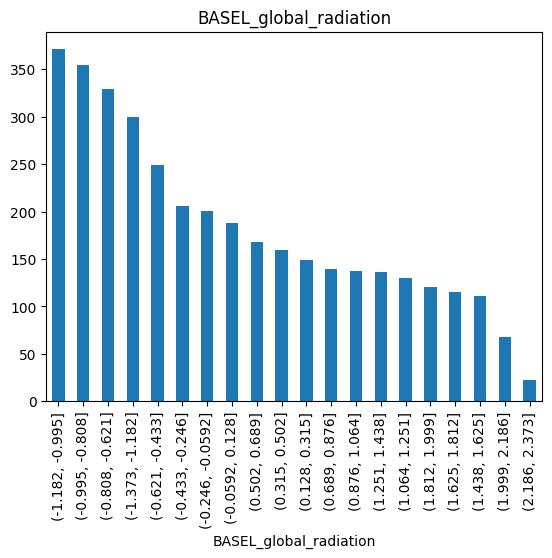

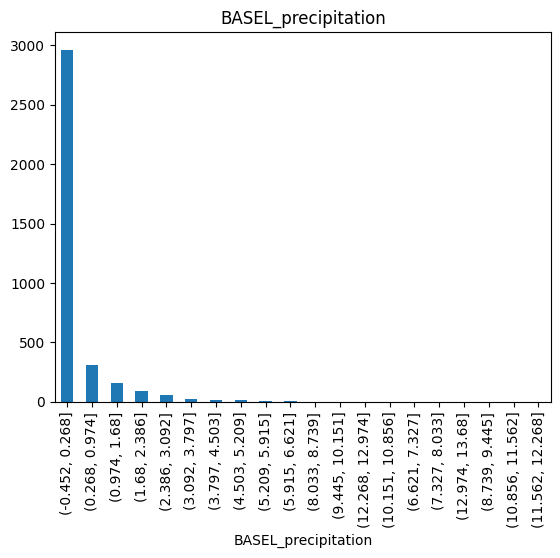

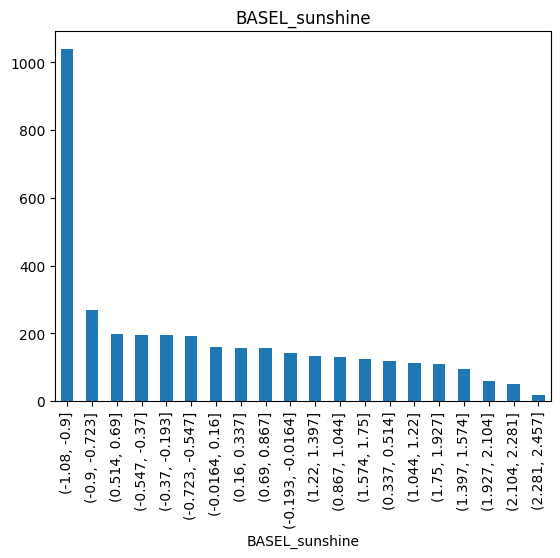

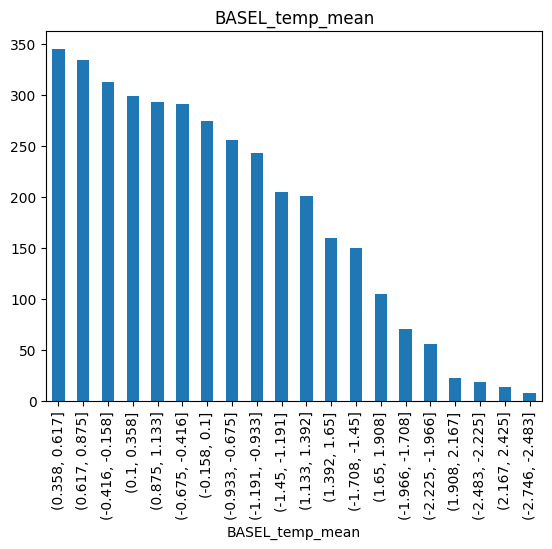

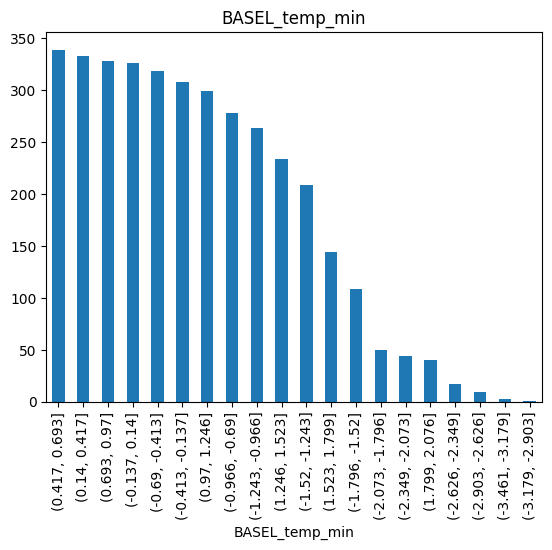

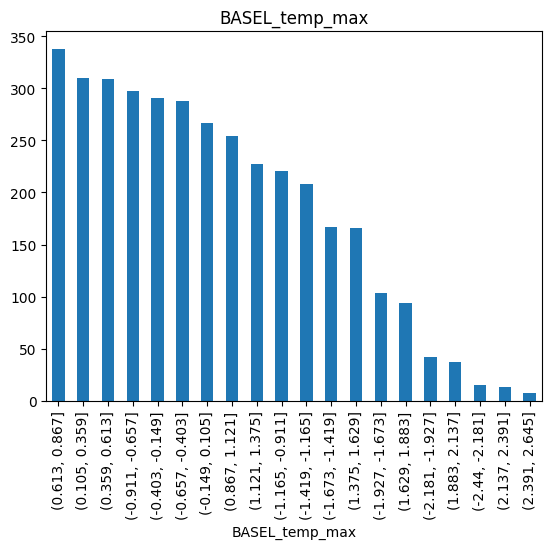

In [58]:
for column in dataset.columns:
    # Kiểm tra nếu cột là dữ liệu số
    if pd.api.types.is_numeric_dtype(dataset[column]):
        bins = pd.cut(dataset[column], bins=20)
        count_data = bins.value_counts()
        # Vẽ biểu đồ
        count_data.plot(kind='bar')
        plt.title(column)
        plt.show()

## 5. Huấn luyện mô hình

### 5.1. RNN

#### Tạo dữ liệu time series

In [59]:
def create_time_series(X, y, time_steps):
    generator = TimeseriesGenerator(
        X, y, length=time_steps, batch_size=1
    )
    X_series = []
    y_series = []
    for i in range(len(generator)):
        x, y = generator[i]
        X_series.append(x[0])
        y_series.append(y[0])
    return np.array(X_series), np.array(y_series)

#### Chia dữ liệu thành tập train và tập test dựa trên thời gian

In [60]:
# Time steps = n tương ứng với n ngày, do dữ liệu sẽ là các ngày liên tiếp nhau
time_steps = 7

dataset.sort_values(by='DATE', inplace=True)
X = dataset.drop(columns=['DATE'], axis=1)
dataset_label.sort_values(by='DATE', inplace=True)
y = dataset_label[f'{CITY}_BBQ_weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

X_train_series, y_train_series = create_time_series(X_train, y_train.values, time_steps)
X_test_series, y_test_series = create_time_series(X_test, y_test.values, time_steps)

print(X_train_series.shape, y_train_series.shape)
print(X_test_series.shape, y_test_series.shape)


(2550, 7, 9) (2550,)
(1090, 7, 9) (1090,)


#### Tạo model Recurrent Neural Network

In [61]:
modelRNN = Sequential()
modelRNN.add(Input(shape=(time_steps, X_train_series.shape[2])))
modelRNN.add(SimpleRNN(32, activation='sigmoid'))
modelRNN.add(Dense(8, activation='sigmoid'))
modelRNN.add(Dense(1, activation = 'sigmoid'))

modelRNN.compile(optimizer='adam', loss='mean_squared_error')

modelRNN.fit(X_train_series, y_train_series, epochs=32, batch_size=16, validation_split=0.3)

Epoch 1/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2229 - val_loss: 0.1697
Epoch 2/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1637 - val_loss: 0.1440
Epoch 3/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1422 - val_loss: 0.1321
Epoch 4/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1366 - val_loss: 0.1274
Epoch 5/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1328 - val_loss: 0.1247
Epoch 6/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1300 - val_loss: 0.1230
Epoch 7/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1287 - val_loss: 0.1216
Epoch 8/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1230 - val_loss: 0.1206
Epoch 9/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1187 - val_loss: 0.1201
Epoch 10/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1231 - val_loss: 0.1192
Epoch 11/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1175 - val_loss: 0.1180
Epoch 12/32
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

#### Đánh giá mô hình thông qua các metrics

In [62]:
y_pred_prob = modelRNN.predict(X_test_series)
y_pred = (y_pred_prob >= 0.5).astype(int)

rnn_metrics = {
    'accuracy': metrics.accuracy_score(y_test_series, y_pred),
    'precision': metrics.precision_score(y_test_series, y_pred),
    'recall': metrics.recall_score(y_test_series, y_pred),
    'f1': metrics.f1_score(y_test_series, y_pred)
}

print('RNN Metrics: ', rnn_metrics)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RNN Metrics:  {'accuracy': 0.826605504587156, 'precision': 0.6292517006802721, 'recall': 0.6981132075471698, 'f1': 0.6618962432915921}


#### Confusion Matrix của RNN

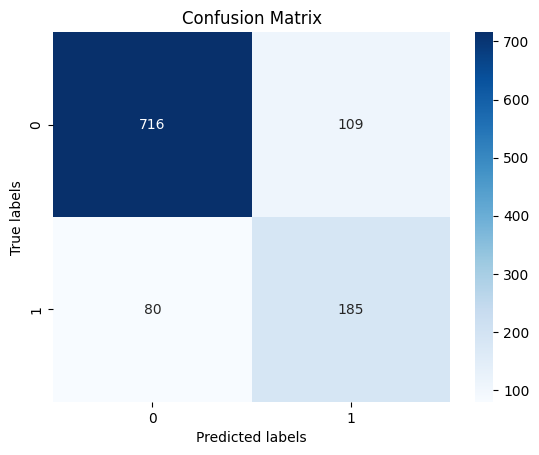

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test_series, y_pred)
seaborn.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 5.2. Random Forest

#### Đối với Random Forest và Logistic Regression không làm việc hiệu quả nên ta sẽ sử dụng kỹ thuật "windowing", tức là gom nhiều mẫu dữ liệu lại thành 1 mẫu dữ liệu, mẫu dữ liệu này sẽ đại diện cho dữ liệu trong 1 khoảng thời gian trên.

In [64]:
def windowing(dataset, dataset_label, features, label, window_size, test_size=0.3):
    dataset  = dataset.sort_values('DATE')
    dataset_label = dataset_label.sort_values('DATE')

    X_rolled = dataset[features].rolling(window=window_size).agg(['mean', 'std', 'min', 'max'])
    X_rolled = X_rolled.dropna()
    y_aligned = dataset_label[label].iloc[window_size-1:].values

    assert X_rolled.shape[0] == y_aligned.shape[0], "X và y phải có cùng số lượng mẫu dữ liệu (samples)"

    X_train, X_test, y_train, y_test = train_test_split(X_rolled, y_aligned, test_size=test_size, shuffle=False)

    return X_train, X_test, y_train, y_test

In [65]:
X_train, X_test, y_train, y_test = windowing(dataset=dataset, dataset_label=dataset_label, features=columns_to_scaler, label=f'{CITY}_BBQ_weather', window_size=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2553, 36) (1095, 36) (2553,) (1095,)


#### Tạo Grid Search CV để tìm kiếm siêu tham số thích hợp nhất cho mô hình

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Tham số tốt nhất:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


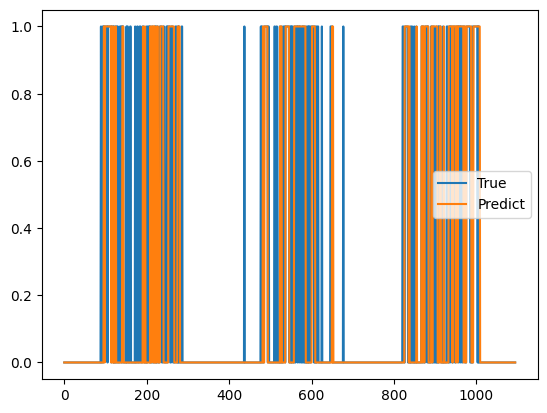

In [66]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1,
                              verbose=2, refit=True, scoring='f1')

grid_search_rf.fit(X_train, y_train)

print('Tham số tốt nhất: ', grid_search_rf.best_params_)

y_pred = grid_search_rf.predict(X_test)

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predict')
plt.legend()
plt.show()

#### Đánh giá mô hình thông qua các metrics

In [67]:

rf_metrics = {
    'accuracy': metrics.accuracy_score(y_test, y_pred),
    'precision': metrics.precision_score(y_test, y_pred),
    'recall': metrics.recall_score(y_test, y_pred),
    'f1': metrics.f1_score(y_test, y_pred)
}

print('Random Forest Metric: ', rf_metrics)

Random Forest Metric:  {'accuracy': 0.8246575342465754, 'precision': 0.6566523605150214, 'recall': 0.5773584905660377, 'f1': 0.6144578313253012}


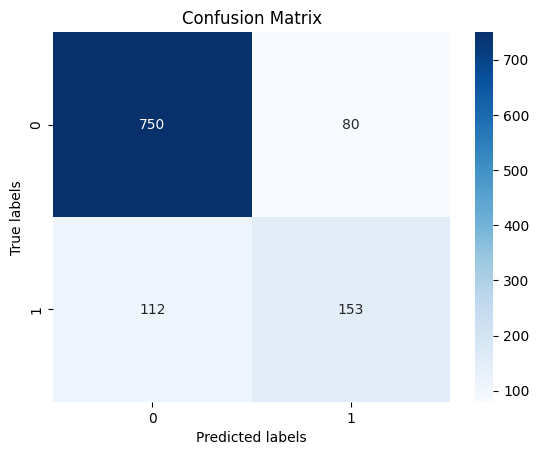

In [68]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
seaborn.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Tham số tốt nhất:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


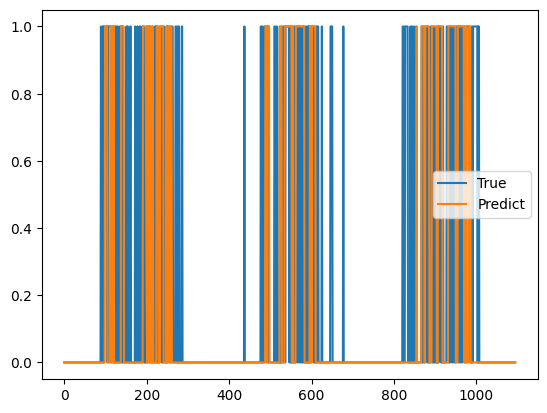

In [69]:
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'max_iter': [100, 200, 300]
}

logistic_regression = LogisticRegression(random_state=42)

grid_search_logistic_regression = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=3, n_jobs=-1,
                                                verbose=2, refit=True, scoring='f1')

grid_search_logistic_regression.fit(X_train, y_train)

print('Tham số tốt nhất: ', grid_search_logistic_regression.best_params_)

y_pred = grid_search_logistic_regression.predict(X_test)

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predict')
plt.legend()
plt.show()

In [70]:
lr_metrics = {
    'accuracy': metrics.accuracy_score(y_test, y_pred),
    'precision': metrics.precision_score(y_test, y_pred),
    'recall': metrics.recall_score(y_test, y_pred),
    'f1': metrics.f1_score(y_test, y_pred)
}

print('Logistic Regression Metrics: ', lr_metrics)

Logistic Regression Metrics:  {'accuracy': 0.8045662100456621, 'precision': 0.625615763546798, 'recall': 0.47924528301886793, 'f1': 0.5427350427350427}


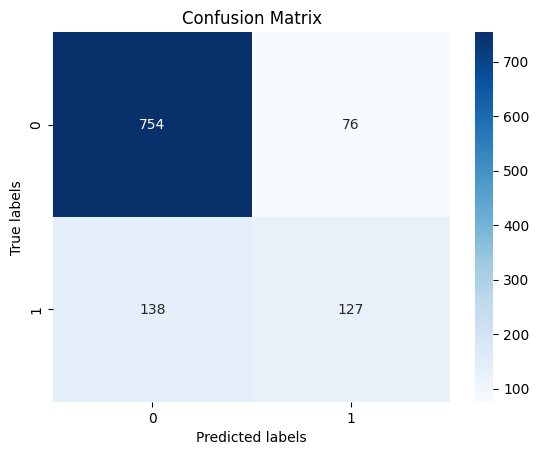

In [71]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
seaborn.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 6. So sánh kết quả của các mô hình thông qua các metrics

In [72]:
pretty_table = PrettyTable()

pretty_table.field_names = ['Model', 'F1', 'Accuracy', 'Precision', 'Recall']
pretty_table.add_row(['RNN', rnn_metrics['f1'], rnn_metrics['accuracy'], rnn_metrics['precision'], rnn_metrics['recall']])
pretty_table.add_row(['Random Forest Classifier', rf_metrics['f1'], rf_metrics['accuracy'], rf_metrics['precision'], rf_metrics['recall']])
pretty_table.add_row(['Logistic Regression', lr_metrics['f1'], lr_metrics['accuracy'], lr_metrics['precision'], lr_metrics['recall']])

print(pretty_table)


+--------------------------+--------------------+--------------------+--------------------+---------------------+
|          Model           |         F1         |      Accuracy      |     Precision      |        Recall       |
+--------------------------+--------------------+--------------------+--------------------+---------------------+
|           RNN            | 0.6618962432915921 | 0.826605504587156  | 0.6292517006802721 |  0.6981132075471698 |
| Random Forest Classifier | 0.6144578313253012 | 0.8246575342465754 | 0.6566523605150214 |  0.5773584905660377 |
|   Logistic Regression    | 0.5427350427350427 | 0.8045662100456621 | 0.625615763546798  | 0.47924528301886793 |
+--------------------------+--------------------+--------------------+--------------------+---------------------+
